<h2 align="center"> SINGLE CELLS: </h2>
<h3 align="center"> UMA ANÁLISE DOS TIPOS DE CÉLULA PRESENTES NO INTESTINO  </h3>

<hr>

<p> O intestino é um órgão complexo que promove a digestão, extrai nutrientes, participa na vigilância imunológica, mantém relações simbióticas críticas com a microbiota e afeta a saúde geral. Entender este órgão promove uma melhor analise do comportamento e interação das células que o constituem, entretanto, métodos clássicos de expressão gênica não analisam as interações respeitando o comportamento heterogênico destas, desse modo, a expressão gênica unicelular (scRNA-seq) nos permite uma analise única para determinação do estado, função e resposta celular das células em nível unicelular para mais de milhões de células em um único estudo, permitindo a classificação, distinção e caracterização de cada célula ao nível do transcriptoma. O objetivo deste trabalho é realizar o tratamento de dados do intestino aplicando técnicas de Machine Learning com o datase do Tabula Sapiens.  </p>


<p> O projeto foi elaborado pelos estudantes durante o quarto semestre de graduação da Ilum - Escola de Ciência, para a disciplina de Biomatmática. O grupo é composto pelos estudantes: </p>

<p> 1. Caio Eduardo Palatin  </p>
<p> 2. João Pedro Aroucha de Brito  </p>
<p> 3. Monyque Karoline de Paula Silva </p>
<p align="justify">

<h3 align="="> TRATAMENTO INICIAL DOS DADOS  </h3>


#### Imports

In [1]:
#Importação das bibliotecas
import anndata as ad
import scanpy as sc
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import random

import matplotlib.pyplot as plt
import matplotlib

from collections import defaultdict
from statistics import mode

import warnings
warnings.filterwarnings('ignore')

#### Leitura de dados

In [2]:
# Leitura do primeiro arquivo .h5ad
adata = sc.read_h5ad('large.h5ad')

# Leitura do segundo arquivo .h5ad
adatinha = sc.read_h5ad('small.h5ad')

# Analisa a compatibilidade da estrutura dos dois datasets e se forem compatíveis, realizar o merge com o comando 'concat'
if adata.shape[1] == adatinha.shape[1]:
    merged_adata = ad.concat([adata, adatinha], merge='unique')
else:
    print("The AnnData objects have incompatible shapes and cannot be merged.")

#### Filtragem de células

In [3]:
# Filtragem de células dentro dos dados
def filterCells(ann, nGenes, nCells):
    sc.pp.filter_cells(ann, min_genes=nGenes) # Retirando células com menos de (nGenes) genes
    sc.pp.filter_genes(ann, min_cells=nCells) # Retirando genes que aparecem em menos de (nCells) células

In [4]:
filterCells(adata, 200, 3)
filterCells(adatinha, 200, 3)
filterCells(merged_adata, 200, 3)

#### Mostrando os dados

In [5]:
# Intestino Delgado
display(adata)
print()

# Intestino Grosso
display(adatinha)
print()

# União dos datas - sem a expressão gênica (ela não conseguiu ser acoplada)
display(merged_adata)

AnnData object with n_obs × n_vars = 13680 × 35441
    obs: 'assay_ontology_term_id', 'donor_id', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'sex_ontology_term_id', 'disease_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'suspension_type', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_type', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'ensembl_version', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'n_cells'
    uns: '_scvi', '_training_mode', 'assay_colors', 'cell_ontology_class_colors', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_predi

AnnData object with n_obs × n_vars = 12467 × 36075
    obs: 'assay_ontology_term_id', 'donor_id', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'sex_ontology_term_id', 'disease_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'suspension_type', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_type', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'ensembl_version', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'n_cells'
    uns: '_scvi', '_training_mode', 'assay_colors', 'cell_ontology_class_colors', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_predi

AnnData object with n_obs × n_vars = 26147 × 42949
    obs: 'assay_ontology_term_id', 'donor_id', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'sex_ontology_term_id', 'disease_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'suspension_type', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage'
    var: 'feature_type', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std', 'ensembl_version', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'n_cells'
    obsm: 'X_pca', 'X_scvi', 'X_scvi_umap', 'X_umap'

### FUNÇÕES

In [6]:
anotXY = (0, 1.03)

def pcaAnn(ann, name, anot, projection='2d', color='cell_type', ax=None):
    if ax != None:
        sc.pl.pca(ann, projection=projection, color=color, show=False, ax=ax)
        ax.set_title(name, weight='bold')
        ax.annotate(anot, xy=anotXY, xycoords='axes fraction', fontsize=30, weight='bold')
    else:
        sc.pl.pca(ann, projection=projection, color=color, show=False)
        plt.gcf().suptitle(name, weight='bold')

def umapAnn(ann, name, anot, color='cell_type', ax=None):
    if ax != None:
        sc.pl.umap(ann, color=color, show=False, ax=ax)
        ax.set_title(name, weight='bold')
        ax.annotate(anot, xy=anotXY, xycoords='axes fraction', fontsize=30, weight='bold')
    else:
        sc.pl.umap(ann, color=color, show=False)
        plt.gcf().suptitle(name, weight='bold')

def leidenAnn(ann, name, anot, resolution=.3, color=['leiden'], ax=None):
    sc.pp.neighbors(ann)
    sc.tl.leiden(ann, resolution=resolution)
    
    if ax != None:
        sc.pl.umap(ann, color=color, show=False, ax=ax)
        ax.set_title(name, weight='bold')
        ax.annotate(anot, xy=anotXY, xycoords='axes fraction', fontsize=30, weight='bold')
    else:
        sc.pl.umap(ann, color=color, show=False)
        plt.gcf().suptitle(name, weight='bold')

def accuracyLeiden(ann, name):
    preClusters = defaultdict(lambda: [])
    clustersIds = defaultdict(lambda: [])
    
    for cellId, cellCluster in zip(ann.obs['leiden'].index, ann.obs['leiden']):
        preClusters[cellCluster].append(ann.obs.loc[cellId]['cell_type'])
        clustersIds[cellCluster].append(cellId)
    
    clusters = defaultdict(lambda: None)
    
    for key in preClusters:
        moda = mode(preClusters[key])
        clusters[moda] = clustersIds[key]
    
    right = 0
    size = 0
    for predictedType in clusters:
        for cellId in clusters[predictedType][:10]:
            trueType = ann.obs.loc[cellId]['cell_type']
            right += (predictedType == trueType)
            size += 1
    
    acc = right/size
    
    return acc
    
def markerGenesFinder(ann, name, groupby='cell_type', method='wilcoxon', geneSymbols='feature_name', ax=None):
    sc.pp.log1p(ann)
    sc.tl.rank_genes_groups(ann, groupby, method=method, use_raw=False)
    if ax != None:
        sc.pl.rank_genes_groups(ann, sharey=False, show=False, use_raw=False, gene_symbols=geneSymbols, ax=ax)
    else:
        sc.pl.rank_genes_groups(ann, sharey=False, show=False, use_raw=False, gene_symbols=geneSymbols)
        
    marker_genes = {}
    fig = plt.gcf()
    fig.suptitle(name, weight='bold')
    for ax in fig.axes:
        title = ax.get_title().split(' vs. ')[0]
        gene_symbol = ax.get_children()[0].get_text()
        marker_genes[title] = gene_symbol
        
    plt.clf()
        
    return marker_genes

def mostExprGenes(ann, name, anot, nTop=20, geneSymbols='feature_name', ax=None):
    if ax != None:
        sc.pl.highest_expr_genes(ann, n_top=nTop, gene_symbols=geneSymbols, show=False, ax=ax)
        ax.set_title(name, weight='bold')
        ax.annotate(anot, xy=anotXY, xycoords='axes fraction', fontsize=30, weight='bold')
    else:
        sc.pl.highest_expr_genes(ann, n_top=nTop, gene_symbols=geneSymbols, show=False)
        plt.gcf().suptitle(name, weight='bold')

def dendrogramAnn(ann, name, groupby='cell_type'):
    sc.tl.dendrogram(ann, groupby)
    sc.pl.dendrogram(ann, groupby, show=False)
    plt.gcf().suptitle(name, weight='bold')

def dotplotAnn(ann, markerGenesDict, name, groupby='cell_type', dendrogram=True, geneSymbols='feature_name', ax=None):
    if ax != None:
        sc.pl.dotplot(ann, markerGenesDict, groupby=groupby, dendrogram=dendrogram, use_raw=False, gene_symbols=geneSymbols, show=False, ax=ax)
        # ax.set_title(name, weight='bold', x=.2)
    else:
        sc.pl.dotplot(ann, markerGenesDict, groupby=groupby, dendrogram=dendrogram, use_raw=False, gene_symbols=geneSymbols, show=False)
        plt.gcf().suptitle(name, weight='bold')

def matrixplotAnn(ann, markerGenesDict, name, groupby='cell_type', geneSymbols='feature_name'):
    mp = sc.pl.matrixplot(ann, markerGenesDict, groupby, return_fig=True, use_raw=False, gene_symbols=geneSymbols)
    mp.add_totals().style(edge_color='black')
    plt.gcf().suptitle(name, weight='bold')

def heatmapAnn(ann, markerGenesDict, name, groupby='cell_type', dendrogram=True, geneSymbols='feature_name', figsize=(10, 10)):
    sc.pl.heatmap(ann, markerGenesDict, groupby=groupby, dendrogram=dendrogram, use_raw=False, gene_symbols=geneSymbols, figsize=figsize, show=False)
    plt.gcf().suptitle(name, weight='bold')

def tracksplotAnn(ann, markerGenesDict, name, groupby='cell_type', dendrogram=True, geneSymbols='feature_name', figsize=(30, 15)):
    sc.pl.tracksplot(ann, markerGenesDict, groupby=groupby, dendrogram=dendrogram, use_raw=False, gene_symbols=geneSymbols, figsize=figsize, show=False)
    plt.gcf().suptitle(name, weight='bold')

def violinAnn(ann, markerGenesDict, name, groupby='cell_type', geneSymbols='feature_name', figsize=(10, 10)):
    sc.pl.stacked_violin(ann, markerGenesDict, groupby=groupby, use_raw=False, gene_symbols=geneSymbols, figsize=figsize, show=False)
    plt.gcf().suptitle(name, weight='bold')

### TODOS OS PLOTS

PCA COMPLETE!
UMAP COMPLETE!
Leiden COMPLETE!
Leiden accuracy COMPLETE!
Marker genes detection COMPLETE!
Most expressed  COMPLETE!
DotPlot COMPLETE!
Intestino grosso Leiden accuracy: 0.89 / 89.00%
Intestino grosso Plots:


    

PCA COMPLETE!
UMAP COMPLETE!
Leiden COMPLETE!
Leiden accuracy COMPLETE!
Marker genes detection COMPLETE!
Most expressed  COMPLETE!
DotPlot COMPLETE!
Intestino delgado Leiden accuracy: 0.8454545454545455 / 84.55%
Intestino delgado Plots:


    



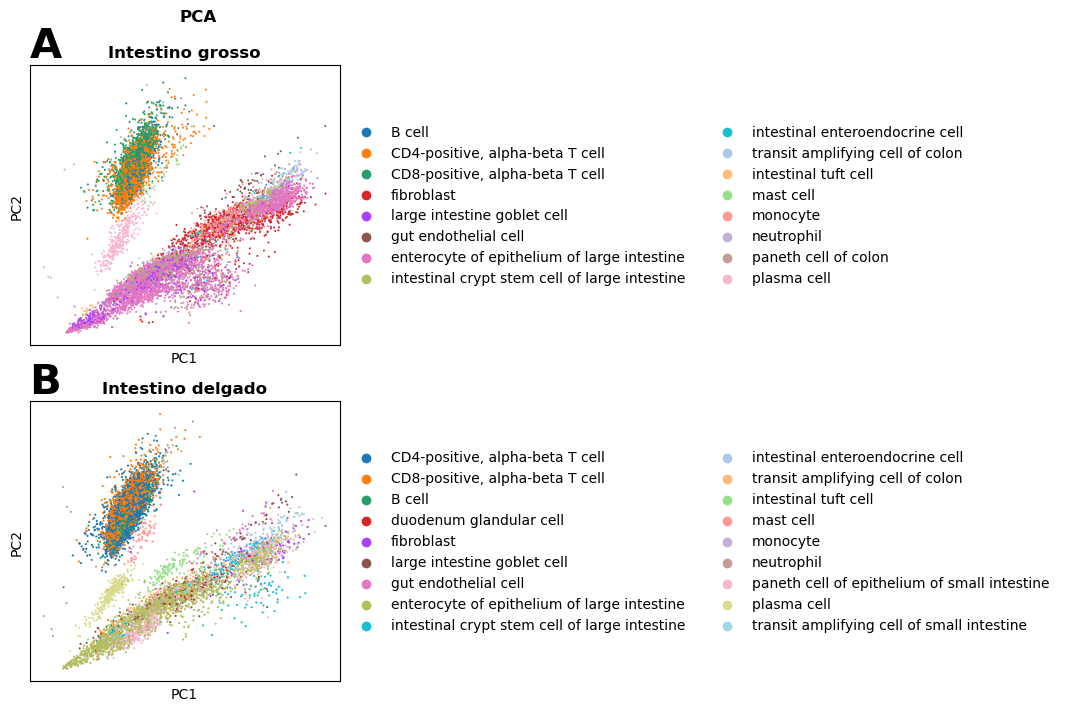

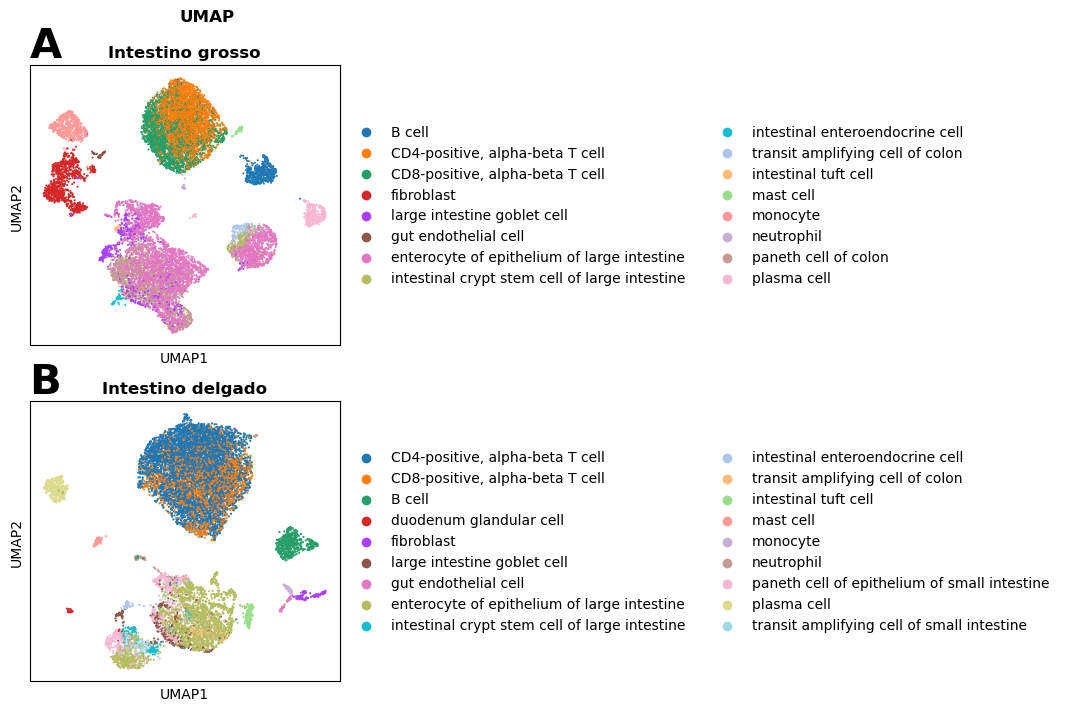

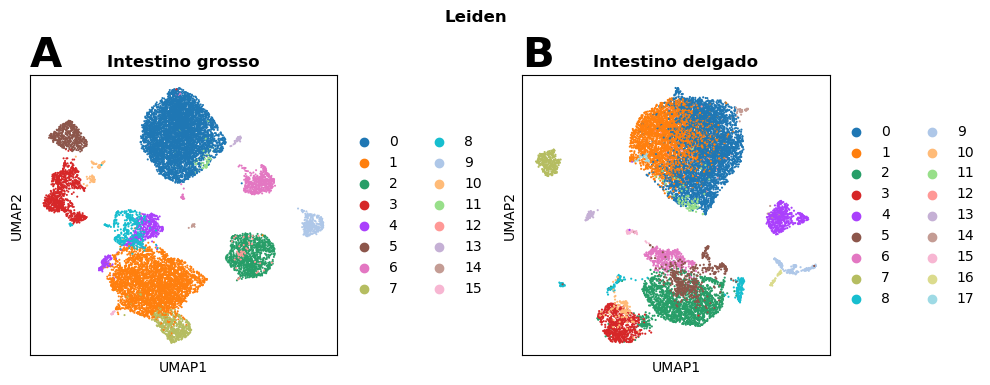

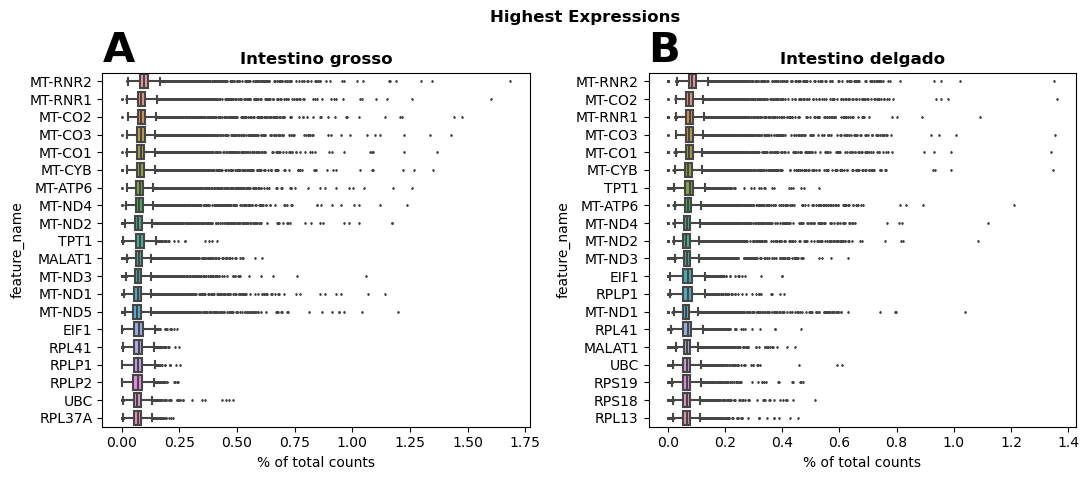

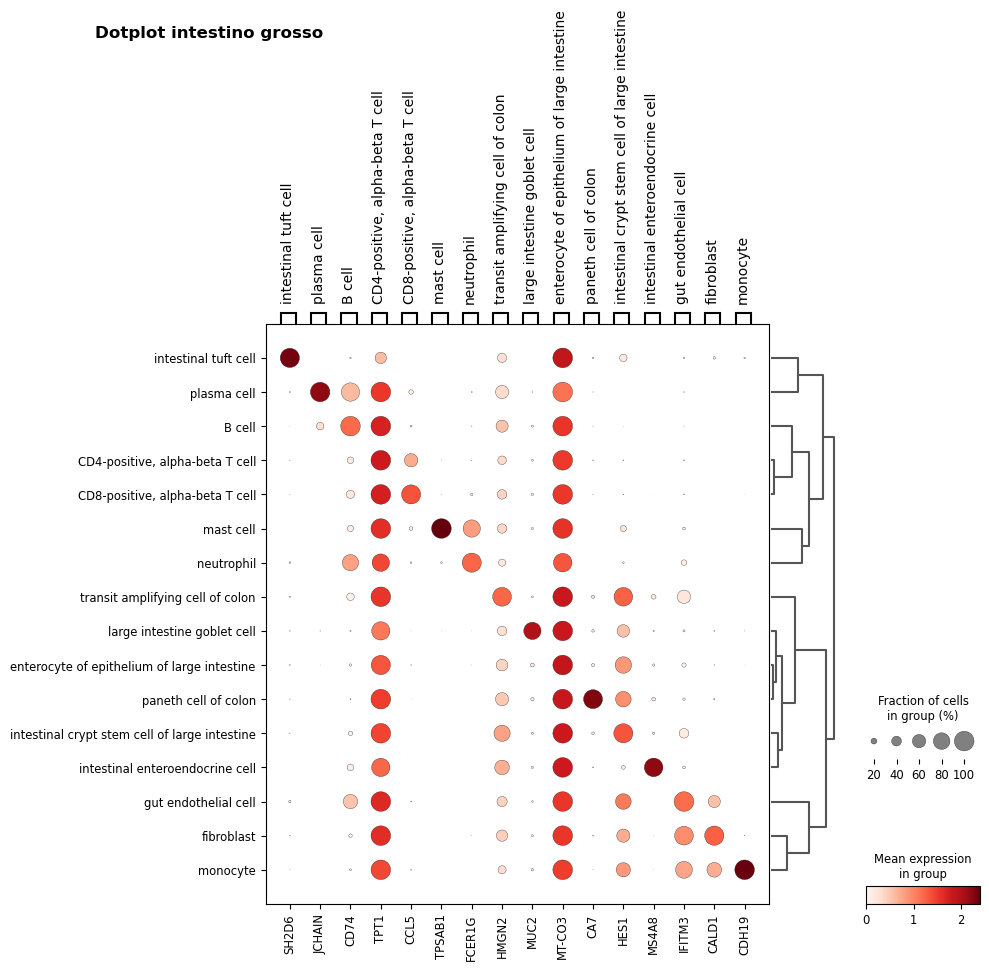

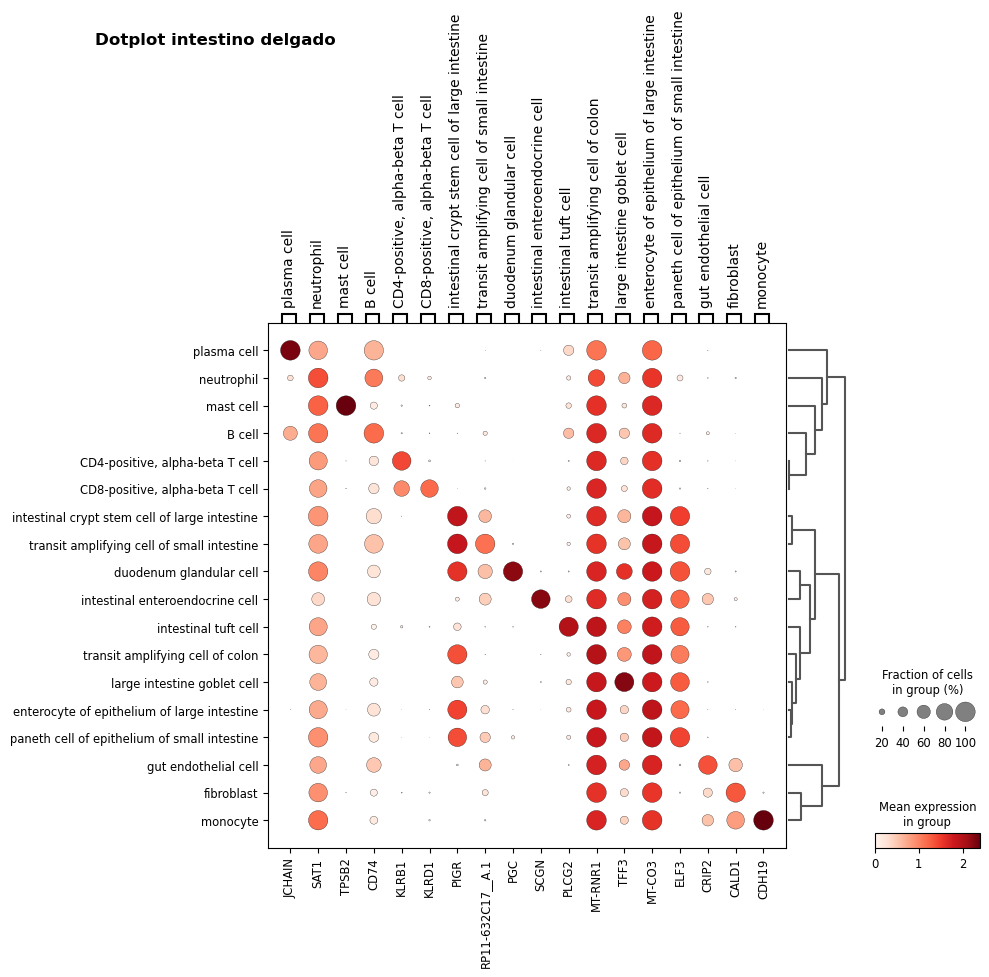

<Figure size 2560x1920 with 0 Axes>

<Figure size 2560x2400 with 0 Axes>

In [7]:
datas = [adata, adatinha]
names = ['Intestino grosso', 'Intestino delgado']
anots = ['A', 'B']

figPCA, (ax1pca, ax2pca) = plt.subplots(2, 1, figsize=(4, 8), dpi=100)
figUMAP, (ax1umap, ax2umap) = plt.subplots(2, 1, figsize=(4, 8), dpi=100)
figLeiden, (ax1leiden, ax2leiden) = plt.subplots(1, 2, figsize=(10, 4), dpi=100)
figExpr, (ax1expr, ax2expr) = plt.subplots(1, 2, figsize=(11, 5), dpi=100)
figDot1, ax1dot = plt.subplots(1, 1, figsize=(10, 10), dpi=100)
figDot2, ax2dot = plt.subplots(1, 1, figsize=(10, 10), dpi=100)

figs = [figPCA, figUMAP, figLeiden, figExpr, figDot1, figDot2]
figNames = ['PCA', 'UMAP', 'Leiden', 'Highest Expressions', 'Dotplot intestino grosso', 'Dotplot intestino delgado']
aligns = [.5, .5, .45, .45, .1, .1]
filenames = ['pca.eps', 'umap.eps', 'leiden.eps', 'highestExpr.eps', 'dotplotLarge.eps', 'dotplotSmall.eps']

axes = {
    'Intestino grosso': {'pca': ax1pca, 'umap': ax1umap, 'leiden': ax1leiden, 'expression': ax1expr, 'dotplot': ax1dot},
    'Intestino delgado': {'pca': ax2pca, 'umap': ax2umap, 'leiden': ax2leiden, 'expression': ax2expr, 'dotplot': ax2dot},
}

for data, name, anot in zip(datas, names, anots):
    pcaAnn(data, name, anot, ax=axes[name]['pca'])
    print('PCA COMPLETE!')
    
    umapAnn(data, name, anot, ax=axes[name]['umap'])
    print('UMAP COMPLETE!')
    
    leidenAnn(data, name, anot, ax=axes[name]['leiden'])
    print('Leiden COMPLETE!')
    
    accLeiden = accuracyLeiden(data, name)
    print('Leiden accuracy COMPLETE!')
    
    markerGeneDict = markerGenesFinder(data, name, ax=axes[name]['expression'])
    print('Marker genes detection COMPLETE!')
    
    mostExprGenes(data, name, anot, ax=axes[name]['expression'])
    print('Most expressed  COMPLETE!')
    
#     dendrogramAnn(data, name)
#     print('Dendrogram COMPLETE!')
    
    dotplotAnn(data, markerGeneDict, name, ax=axes[name]['dotplot'])
    print('DotPlot COMPLETE!')
    
#     matrixplotAnn(data, markerGeneDict, name)
#     print('Matrix plot COMPLETE!')
    
#     heatmapAnn(data, markerGeneDict, name)
#     print('Heatmap COMPLETE!')
    
#     tracksplotAnn(data, markerGeneDict, name)
#     print('Tracksplot COMPLETE!')
    
#     violinAnn(data, markerGeneDict, name)
#     print('Stacked Violin COMPLETE!')

    print(f'{name} Leiden accuracy: {accLeiden} / {100*accLeiden:.2f}%')
    print(f'{name} Plots:')
    
    print('''\n
        ========================================================================================
        ========================================================================================
        ========================================================================================
    \n''')
    
for fig, name, al, filename in zip(figs, figNames, aligns, filenames):
    fig.suptitle(name, x=al, y=.95, horizontalalignment='left', verticalalignment='top', weight='bold')
    fig.tight_layout()
    fig.savefig('Figs/' + filename, format='eps', bbox_inches='tight')

plt.show()